In [2]:
%pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

In [5]:
df_loan = pd.read_csv("loan.csv")
df_loan.head(7)

/tmp/ipython-input-5-2829928926.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542320 entries, 0 to 542319
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           542320 non-null  int64  
 1   member_id                    542319 non-null  float64
 2   loan_amnt                    542319 non-null  float64
 3   funded_amnt                  542319 non-null  float64
 4   funded_amnt_inv              542319 non-null  float64
 5   term                         542319 non-null  object 
 6   int_rate                     542319 non-null  float64
 7   installment                  542319 non-null  float64
 8   grade                        542319 non-null  object 
 9   sub_grade                    542319 non-null  object 
 10  emp_title                    510090 non-null  object 
 11  emp_length                   516684 non-null  object 
 12  home_ownership               542319 non-null  object 
 13 

In [6]:
###Removing Irrelevant coloumn
columns_to_keep = ['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership','annual_inc','verification_status','loan_status','purpose']
df_clean = df_loan[columns_to_keep]

In [7]:
#Find any missing values in the dataset
df_clean.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length,44825
home_ownership,0
annual_inc,4
verification_status,0
loan_status,0


In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            887379 non-null  float64
 1   term                 887379 non-null  object 
 2   int_rate             887379 non-null  float64
 3   installment          887379 non-null  float64
 4   grade                887379 non-null  object 
 5   emp_length           842554 non-null  object 
 6   home_ownership       887379 non-null  object 
 7   annual_inc           887375 non-null  float64
 8   verification_status  887379 non-null  object 
 9   loan_status          887379 non-null  object 
 10  purpose              887379 non-null  object 
dtypes: float64(4), object(7)
memory usage: 74.5+ MB


In [8]:
df_clean['annual_inc'] = df_clean.annual_inc.fillna(0)
df_clean.isnull().sum()

/tmp/ipython-input-8-1160771435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['annual_inc'] = df_clean.annual_inc.fillna(0)


,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length,44825
home_ownership,0
annual_inc,0
verification_status,0
loan_status,0


In [9]:
df_clean.loan_status.fillna(0)
df_clean.loan_status.dropna()

,loan_status
0,Fully Paid
1,Charged Off
2,Fully Paid
3,Fully Paid
4,Current
...,...
887374,Current
887375,Current
887376,Current
887377,Current


In [10]:
df_clean['loan_status'].replace('Fully Paid', 0, inplace=True)
df_clean['loan_status'].replace('Does not meet the credit policy. Status:Fully Paid', 0, inplace=True)
df_clean['loan_status'].replace('Current', 0, inplace=True)
df_clean['loan_status'].replace('Late (31-120 days)', 1, inplace=True)
df_clean['loan_status'].replace('Late (16-30 days)', 1, inplace=True)
df_clean['loan_status'].replace('In Grace Period', 1, inplace=True)
df_clean['loan_status'].replace('Charged Off', 1, inplace=True)
df_clean['loan_status'].replace('Default', 1, inplace=True)
df_clean['loan_status'].replace('Issued', 1, inplace=True)
df_clean['loan_status'].replace('Does not meet the credit policy. Status:Charged Off', 1, inplace=True)

/tmp/ipython-input-10-3855460917.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['loan_status'].replace('Fully Paid', 0, inplace=True)
/tmp/ipython-input-10-3855460917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['loan_status'].replace('Fully Paid', 0, inplace=True)
/tmp/ipython-input-10-3855460917.py:2: FutureWarn

In [11]:
df_clean= df_clean.rename(columns={'loan_status':'label'})

In [12]:
# label several label with specific grading system.
def SC_LabelEncoder1(text):
    if text == "E":
        return 1
    elif text == "D":
        return 2
    elif text == "C":
        return 3
    elif text == "B":
        return 4
    elif text == "A":
        return 5
    else:
        return 0


def SC_LabelEncoder2(text):
    if text == "< 1 year":
        return 1
    elif text == "1 year":
        return 2
    elif text == "2 years":
        return 3
    elif text == "3 years":
        return 4
    elif text == "4 years":
        return 5
    elif text == "5 years":
        return 6
    elif text == "6 years":
        return 7
    elif text == "7 years":
        return 8
    elif text == "8 years":
        return 9
    elif text == "9 years":
        return 10
    elif text == "10 years":
        return 11
    elif text == "10+ years":
        return 12
    else:
        return 0

def SC_LabelEncoder3(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0

df_clean["grade"] = df_clean["grade"].apply(SC_LabelEncoder1)
df_clean["emp_length"] = df_clean["emp_length"].apply(SC_LabelEncoder2)
df_clean["home_ownership"] = df_clean["home_ownership"].apply(SC_LabelEncoder3)

In [13]:
df_clean.head(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,label,purpose
0,5000.0,36 months,10.65,162.87,4,12,1,24000.0,Verified,0,credit_card
1,2500.0,60 months,15.27,59.83,3,1,1,30000.0,Source Verified,1,car
2,2400.0,36 months,15.96,84.33,3,12,1,12252.0,Not Verified,0,small_business
3,10000.0,36 months,13.49,339.31,3,12,1,49200.0,Source Verified,0,other
4,3000.0,60 months,12.69,67.79,4,2,1,80000.0,Source Verified,0,other
5,5000.0,36 months,7.90,156.46,5,4,1,36000.0,Source Verified,0,wedding
6,7000.0,60 months,15.96,170.08,3,9,1,47004.0,Not Verified,0,debt_consolidation
7,3000.0,36 months,18.64,109.43,1,10,1,48000.0,Source Verified,0,car
8,5600.0,60 months,21.28,152.39,0,5,3,40000.0,Source Verified,1,small_business
9,5375.0,60 months,12.69,121.45,4,1,1,15000.0,Verified,1,other


In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            887379 non-null  float64
 1   term                 887379 non-null  object 
 2   int_rate             887379 non-null  float64
 3   installment          887379 non-null  float64
 4   grade                887379 non-null  int64  
 5   emp_length           887379 non-null  int64  
 6   home_ownership       887379 non-null  int64  
 7   annual_inc           887379 non-null  float64
 8   verification_status  887379 non-null  object 
 9   label                887379 non-null  int64  
 10  purpose              887379 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 74.5+ MB


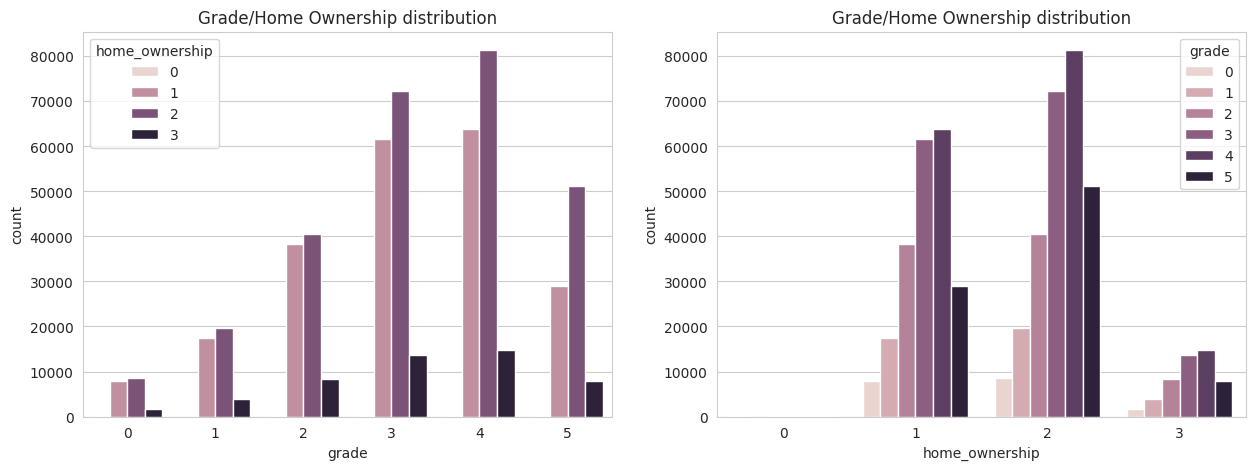

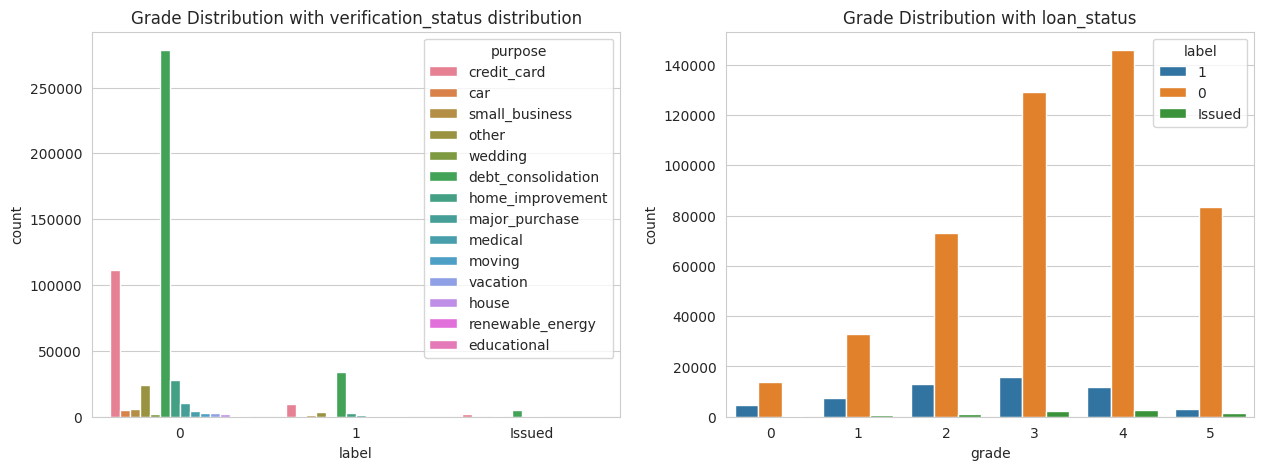

In [29]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_clean, x='grade', hue="home_ownership", ax=ax[0]).set_title("Grade/Home Ownership distribution");
sns.countplot(data=df_clean, x='home_ownership', hue='grade', ax=ax[1]).set_title("Grade/Home Ownership distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_clean, x='label', hue='purpose', ax=ax[0]).set_title("Grade Distribution with verification_status distribution");
sns.countplot(data=df_clean, x='grade', hue='label', ax=ax[1]).set_title("Grade Distribution with loan_status");

###Analysis : The number of Borrowers with high grade will be small compared to low grade Most money borrowers' goals from labels 0 and 1 are debt consolidation The highest number of grades who were able to complete the loan was grade 4, while the most failed to complete the loan was grade 3

Text(0.5, 1.0, 'Loan amounts grouped by purpose')

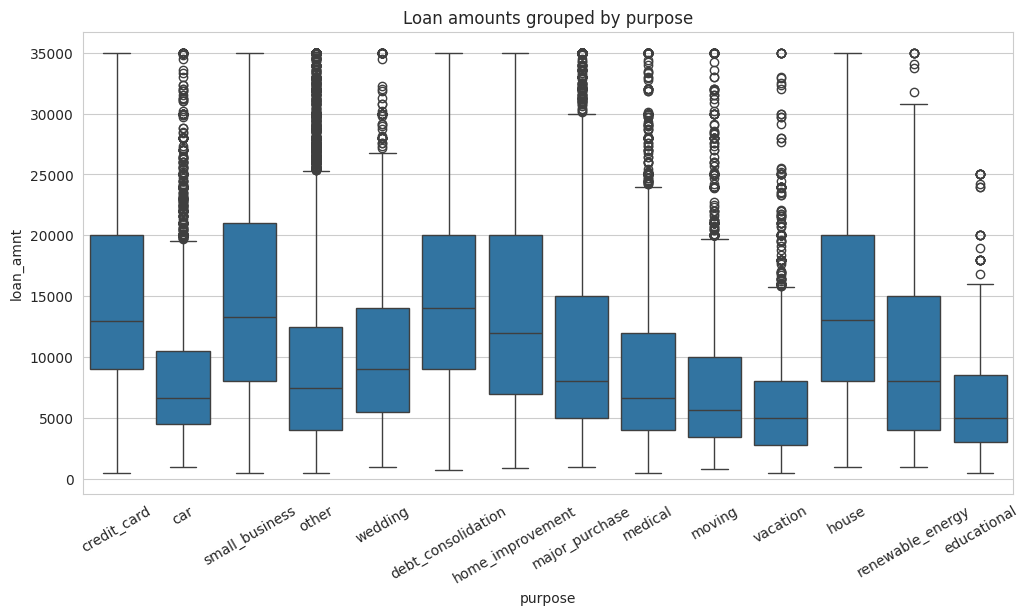

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='loan_amnt', data=df_clean)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

Analysis : There are 5 highest categories for the amount of credit with the following purposes: Credit card, MSME business, debt consolidation, home improvement, and buying a house

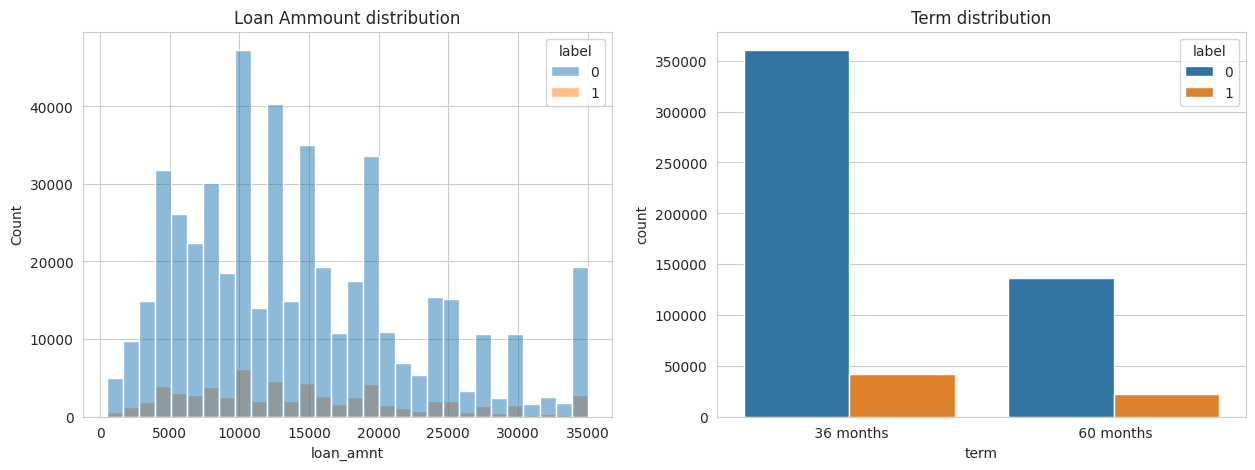

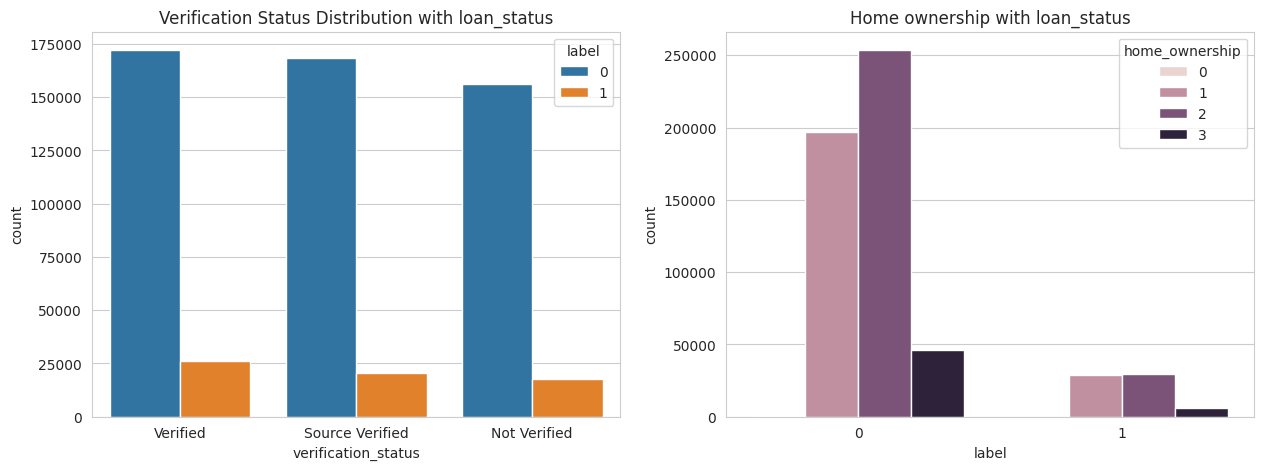

In [35]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df_clean, x='loan_amnt',hue="label", bins=30, ax=ax[0]).set_title("Loan Ammount distribution");
sns.countplot(data=df_clean, x='term', hue="label", ax=ax[1]).set_title("Term distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_clean, hue='home_ownership', x='label', ax=ax[1]).set_title("Home ownership with loan_status");
sns.countplot(data=df_clean, x='verification_status', hue='label', ax=ax[0]).set_title("Verification Status Distribution with loan_status");

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            887379 non-null  float64
 1   term                 887379 non-null  object 
 2   int_rate             887379 non-null  float64
 3   installment          887379 non-null  float64
 4   grade                887379 non-null  int64  
 5   emp_length           887379 non-null  int64  
 6   home_ownership       887379 non-null  int64  
 7   annual_inc           887379 non-null  float64
 8   verification_status  887379 non-null  object 
 9   label                887379 non-null  int64  
 10  purpose              887379 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 74.5+ MB


In [15]:
# use LabelEncoder() to encode another category column:
for col in ["verification_status", "purpose","term"]:
    le = LabelEncoder()
    le.fit(df_clean[col])
    df_clean[col] = le.transform(df_clean[col])
df_clean.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,label,purpose
0,5000.0,0,10.65,162.87,4,12,1,24000.0,2,0,1
1,2500.0,1,15.27,59.83,3,1,1,30000.0,1,1,0
2,2400.0,0,15.96,84.33,3,12,1,12252.0,0,0,11
3,10000.0,0,13.49,339.31,3,12,1,49200.0,1,0,9
4,3000.0,1,12.69,67.79,4,2,1,80000.0,1,0,9


In [36]:
corr = df_clean[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','label']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

/tmp/ipython-input-36-1184773438.py:3: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [16]:
# use LabelEncoder() to encode another category column:
for col in ["verification_status", "purpose","term"]:
    le = LabelEncoder()
    le.fit(df_clean[col])
    df_clean[col] = le.transform(df_clean[col])
df_clean.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,label,purpose
0,5000.0,0,10.65,162.87,4,12,1,24000.0,2,0,1
1,2500.0,1,15.27,59.83,3,1,1,30000.0,1,1,0
2,2400.0,0,15.96,84.33,3,12,1,12252.0,0,0,11
3,10000.0,0,13.49,339.31,3,12,1,49200.0,1,0,9
4,3000.0,1,12.69,67.79,4,2,1,80000.0,1,0,9


In [17]:
df_clean.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0
label,0



Clustering
> Add blockquote



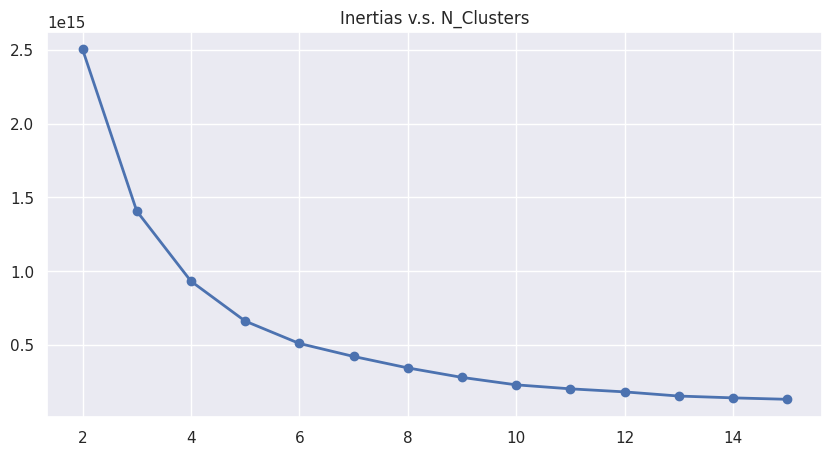

In [55]:
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_clean)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

### Analysis:
"Elbow" on the chart above is at 4. The number of clusters must be 4.

In [18]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(df_clean)

In [19]:
df_clustered = df_clean[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose']]
df_clustered["Cluster"] = clusters

/tmp/ipython-input-19-2759545280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustered["Cluster"] = clusters


In [44]:
### This process take so many time
sns.pairplot(df_clustered[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose'
                           , "Cluster"]], hue="Cluster");

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7a9fb8dcd8a0> (for post_execute):


KeyboardInterrupt: 

In [43]:
df_clean.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0
label,0


In [42]:
X, y = df_clean.drop("label", axis=1), df_clean["label"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [44]:
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    score = f1_score(y_test, neigh.predict(X_test),average='micro')
    if score > max_score:
        max_k = k
        max_score = score

KeyboardInterrupt: 

### Evaluate clustering quality

In [58]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),' to get the best prediction, then the average accuracy is ', max_score)

If we use K-Nearest Neighbors Classification, then the value of K is 0  to get the best prediction, then the average accuracy is  0



### Random forest
```
# This is formatted as code
```



In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [60]:
X, y = df_clean.drop("label", axis=1), df_clean["label"]
X_trainRF, X_testRF, y_trainRF, y_testRF = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [61]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees
rfc.fit(X_trainRF, y_trainRF)

RandomForestClassifier(random_state=42)

In [62]:
# Make predictions
y_pred_clf = rfc.predict(X_testRF)

# Evaluate the model
accuracy = accuracy_score(y_testRF, y_pred_clf)
print(f"Classification Accuracy: {accuracy}")

Classification Accuracy: 0.9116162185309563


### Isolation Forest

In [66]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [67]:
rob_scaler = RobustScaler()
features = rob_scaler.fit_transform(df_clean)

In [71]:
features = pd.DataFrame(df_clean, columns=df_clean.columns[2:])
features.head(10)

,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,label,purpose
0,10.65,162.87,4,12,1,24000.0,2,0,1
1,15.27,59.83,3,1,1,30000.0,1,1,0
2,15.96,84.33,3,12,1,12252.0,0,0,11
3,13.49,339.31,3,12,1,49200.0,1,0,9
4,12.69,67.79,4,2,1,80000.0,1,0,9
5,7.90,156.46,5,4,1,36000.0,1,0,13
6,15.96,170.08,3,9,1,47004.0,0,0,2
7,18.64,109.43,1,10,1,48000.0,1,0,0
8,21.28,152.39,0,5,3,40000.0,1,1,11
9,12.69,121.45,4,1,1,15000.0,2,1,9
